#**Object Detector and Classification in Python with TensorFlow and Keras**
Image recognition refers to the task of inputting an image into a neural network and having it output some kind of label for that image. The label that the network outputs will correspond to a pre-defined class. There can be multiple classes that the image can be labeled as, or just one. If there is a single class, the term "**recognition**" is often applied, whereas a multi-class recognition task is often called "**classification**".

A subset of image classification is **object detection**, where specific instances of objects are identified as belonging to a certain class like animals, cars, or people.

In [16]:
#Import Required Libraries
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt

We require numpy since we're going to use a random seed to ensure the reproducibility.

In [17]:
seed = 21

##**Data Preparation**
Here is the Dataset:
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html 

In [18]:
from keras.datasets import cifar10

In [19]:
# Loading The Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 32, 32, 3)
Test: X=(10000, 1), y=(10000, 1)


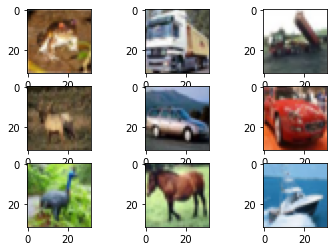

In [20]:
# Show Images In The  Dataset
print(f'Train: X={X_train.shape}, y={X_train.shape}')
print(f'Test: X={y_test.shape}, y={y_test.shape}')
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.rcParams["figure.figsize"] = [5.50, 5.50]
    plt.rcParams["figure.autolayout"] = True
    plt.imshow(X_train[i],cmap="cool")
# show the figure
plt.show()

In [21]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

An image either belongs to one class or it doesn't, it can't fall somewhere in-between. Therefore, the Numpy command **to_categorical**() is used to one-hot encode. This is why the np_utils function is imported from Keras, as it contains to_categorical().

In [22]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]
class_num

10

##**Designing The Model**
Build the sequential model by creating a blank instance and then adding layers to it

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())


model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

##**Training The Model**
In order to train the model the fit() function is called and pass in the chosen parameters.

In [10]:
np.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)

Epoch 1/15
782/782 [==============================] - 162s 207ms/step - loss: 1.4438 - accuracy: 0.4846 - val_loss: 1.1679 - val_accuracy: 0.5797
Epoch 2/15
782/782 [==============================] - 155s 199ms/step - loss: 1.0199 - accuracy: 0.6414 - val_loss: 0.8607 - val_accuracy: 0.6967
Epoch 3/15
782/782 [==============================] - 155s 199ms/step - loss: 0.8558 - accuracy: 0.7026 - val_loss: 0.7927 - val_accuracy: 0.7171
Epoch 4/15
782/782 [==============================] - 157s 201ms/step - loss: 0.7517 - accuracy: 0.7416 - val_loss: 0.6811 - val_accuracy: 0.7625
Epoch 5/15
782/782 [==============================] - 157s 201ms/step - loss: 0.6755 - accuracy: 0.7674 - val_loss: 0.6142 - val_accuracy: 0.7807
Epoch 6/15
782/782 [==============================] - 157s 201ms/step - loss: 0.6134 - accuracy: 0.7887 - val_loss: 0.6223 - val_accuracy: 0.7923
Epoch 7/15
782/782 [==============================] - 156s 199ms/step - loss: 0.5683 - accuracy: 0.8041 - val_loss: 0.5720 -

##**Validation**
Now in order to validate the trained model there is test dataset available, pass it to the model with evaluate function and get to know the accuracy score.

In [11]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.90%


History can be plot in order to check other parameters of validations

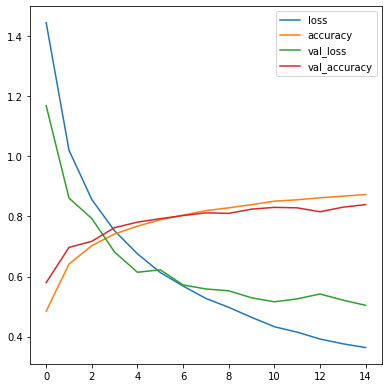

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.show()

In [14]:
# save trained model and also its history
from keras.models import save_model
save_model(model, "best_model.h5")
np.save('my_history.npy',history.history)


##**Load Model**

In [11]:
from numpy import loadtxt
from keras.models import load_model
import numpy as np
model = load_model('best_model.h5')
history=np.load('my_history.npy',allow_pickle='TRUE').item()
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.90%


<AxesSubplot:>

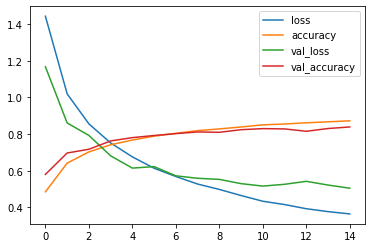

In [13]:
import pandas as pd
pd.DataFrame(history).plot()

##**Testing The Model**
Take a sample image from the dataset and pass it to the model in order to check the model is accurately predicting or not

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
def predictImage(filename):
    img1 = filename    
    plt.imshow(img1) 
    Y = image.img_to_array(img1)  
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X.reshape((1,32,32,3)))  
    val=list(val[0])  
    mx=max(val)
    print(f'{mx*100:.2f}% Accurate')
    val = val.index(mx)
    print(f'Label Index is {val}')
    if val == 0:        
        plt.xlabel("Airplane",fontsize=30)   
    elif val == 1:   
        plt.xlabel("Automobile",fontsize=30)
    elif val == 2:   
        plt.xlabel("bird",fontsize=30)
    elif val == 3:   
        plt.xlabel("cat",fontsize=30)
    elif val == 4:   
        plt.xlabel("deer",fontsize=30)
    elif val == 5:   
        plt.xlabel("dog",fontsize=30)
    elif val == 6:   
        plt.xlabel("frog",fontsize=30)
    elif val == 7:   
        plt.xlabel("horse",fontsize=30)
    elif val == 8:   
        plt.xlabel("ship",fontsize=30)
    elif val == 9:   
        plt.xlabel("truck",fontsize=30)

1/1 [==============================] - 0s 174ms/step
100.00% Accurate
Label Index is 1


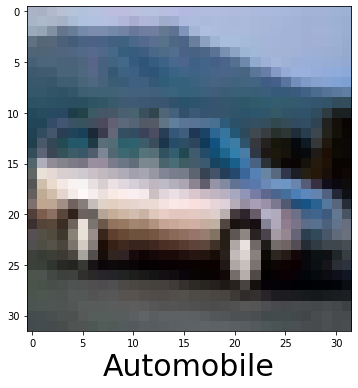

In [24]:
predictImage(X_train[4])

1/1 [==============================] - 0s 19ms/step
100.00% Accurate
Label Index is 7


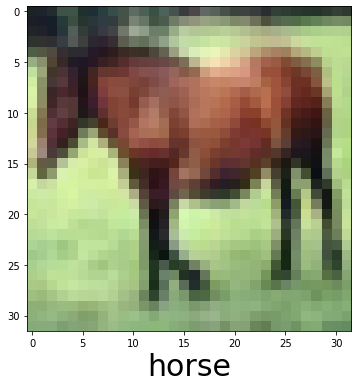

In [26]:
predictImage(X_train[7])

##**Object Detection**
Using OpenCv and Above Model

In [5]:
import cv2

# Load image, grayscale, Gaussian blur, Otsu's threshold, dilate
image = cv2.imread('1.jpg')
original = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
dilate = cv2.dilate(thresh, kernel, iterations=1)

# Find contours, obtain bounding box coordinates, and extract ROI
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for image_number, c in enumerate(cnts):
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite(f"ROI_{image_number}.png", ROI)

# cv2.imshow('image', image)
# cv2.imshow('thresh', thresh)
# cv2.imshow('dilate', dilate)
# cv2.waitKey()

In [8]:
from PIL import Image
image = Image.open("ROI_1.png")
image = image.resize((32,32))
image.save(fp="newimage.png")

1/1 [==============================] - 0s 17ms/step
95.85% Accurate
Label Index is 0


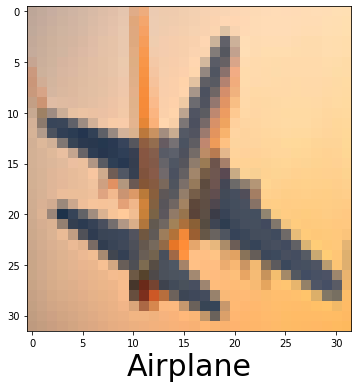

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread('newimage.png')
 
# Output Images
predictImage(img)